In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon


# Read the shapefile
# roads_data = gpd.read_file('osm/roads.shp')
roads_data.name.unique()

array(['Park Rd', 'Embassy Rd', 'Dutabash Rd', ...,
       'Dhap  Kakuly Len Road', 'Shahid Ranjan Chowdhury Road',
       'Collage Road'], dtype=object)

In [ ]:
#Looking at the N1 and N2 it shows that the N1 is running from Dhaka to Chittagong according to wikipedia iThe highway is known along various stretches as the Chittagong–Cox's Bazar Highway and the Cox's Bazar–Teknaf Highway. For this reason we will take in the following key words 'Chittagong', 'Coxs', 'Bazar', 'Teknaf' and 'N1'
#For the N2 the wiki indicates that sections of the highway are known as the Dhaka–Sylhet Highway and the Sylhet-Tamabil Highway. For this reason we will be looking at the key words 'Sylhet-Tamabil', 'Dhaka–Sylhet', N2

In [89]:
# List of keywords
keywords = ['']


# Fill NaN values with an empty string in the 'name' column
roads_data['name'] = roads_data['name'].fillna('')

# Filter the dataframe based on keywords
filtered_roads_data = roads_data[roads_data['name'].str.contains('|'.join(keywords), case=False)]

# Show the filtered dataframe
filtered_roads_data.ref.unique()




array([], dtype=object)

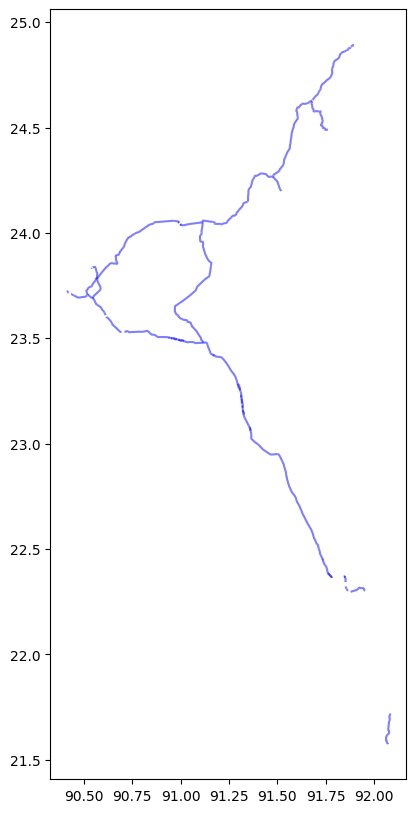

In [108]:
# From looking for the roads, the previous key roads have been identified in the roads_data. Now we will see where they intersect. 
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
roads_data['name'] = roads_data['name'].str.strip()
roads_data['ref'] = roads_data['ref'].astype(str)

# List of key roads
keyroads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet', 'Dhaka-Chittagong Highway', 
            'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy', "Chittagong - Cox's Bazar Highway", 
            "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway', 'Dhaka-Chittagong', 
            "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway", 'Comilla-Sylhet Highway', 'Bhulta Highway', 'Chunurghat - Shaistaganj Hwy', 'N207', 'Sylhet - Moulvibazar Road']


# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on key roads
keyroads_data = roads_data[roads_data['name'].isin(keyroads)]

# Find intersections
intersections = []
for i, road1 in keyroads_data.iterrows():
    for j, road2 in keyroads_data.iterrows():
        if i != j:
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if isinstance(intersection, MultiPolygon):
                    intersections.extend(list(intersection))
                else:
                    intersections.append(intersection)

# Plot intersections
fig, ax = plt.subplots(figsize=(10, 10))
keyroads_data.plot(ax=ax, color='blue', alpha=0.5)
for intersection in intersections:
    if isinstance(intersection, MultiPolygon):
        for polygon in intersection:
            ax.plot(*polygon.exterior.xy, color='red')
    elif isinstance(intersection, Polygon):
        ax.plot(*intersection.exterior.xy, color='red')
plt.show()




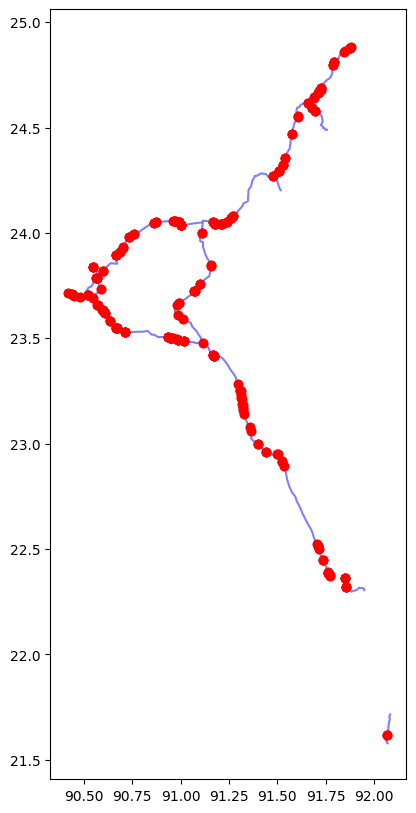

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint

# List of key roads
keyroads = ['Dhaka-Sylhet Highway', 'Dhaka - Sylhet Highway', 'Sylhet - Tamabil Hwy', 
            'Dhaka Sylhet Highway', 'Dhaka-Sylhet', 'Dhaka-Chittagong Highway', 
            'Dhaka–Chittagong Highway', 'Dhaka-Chittagong Hwy', "Chittagong - Cox's Bazar Highway", 
            "Chittagong - Coxs Bazar Hwy", 'Dhaka - Chittagong Highway', 'Dhaka-Chittagong', 
            "Chittagong Cox's Bazar Highway", "Chittagong-Cox's Bazar Highway", 'Comilla-Sylhet Highway', 'Bhulta Highway', 'Chunurghat - Shaistaganj Hwy', 'N207', 'Sylhet - Moulvibazar Road']
# Read the shapefile containing road geometries
roads_data = gpd.read_file('osm/roads.shp')

# Filter roads based on key roads
keyroads_data = roads_data[roads_data['name'].isin(keyroads)]

# Find intersections
intersections = []
for i, road1 in keyroads_data.iterrows():
    for j, road2 in keyroads_data.iterrows():
        if i != j:
            intersection = road1['geometry'].intersection(road2['geometry'])
            if not intersection.is_empty:
                if intersection.geom_type == 'Point':
                    intersections.append(intersection)
                elif intersection.geom_type == 'MultiPoint':
                    for point in intersection.geoms:
                        intersections.append(point)

# Plot roads
fig, ax = plt.subplots(figsize=(10, 10))
keyroads_data.plot(ax=ax, color='blue', alpha=0.5)

# Plot intersection points as red dots
for intersection in intersections:
    if isinstance(intersection, Point):
        ax.plot(intersection.x, intersection.y, 'ro')
    elif isinstance(intersection, MultiPoint):
        for point in intersection:
            ax.plot(point.x, point.y, 'ro')

plt.show()


In [107]:
# Check for NaN values across columns
nan_columns = keyroads_data.columns[roads_data.isnull().any()]

# Print the columns with NaN values
print("Columns with NaN values:", nan_columns)

nan_values_in_name = keyroads_data['name'].isnull().sum()
print("Number of NaN values in 'name' column:", nan_values_in_name)


Columns with NaN values: Index(['name', 'ref', 'maxspeed'], dtype='object')
Number of NaN values in 'name' column: 0
